## Loan Default Risk Prediction for Renewable Energy Financing Project Objective :
## Predict which customers are likely to default on loans to support risk-aware financing decisions.


## Business Understanding- 
## Financial platforms face losses when borrowers fail to repay loans.  
## This project builds a predictive model to estimate the probability of loan default using financial and behavioral features.


### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report



# Loading the dataset
df=pd.read_csv(r"C:\Users\Dell\OneDrive\Desktop\GitHub\solar_panel_loan_data.csv")
# Select only numeric columns
corr = df.corr(numeric_only=True)
corr
# Displays the first 5 rows by default or any specified no. of rows mentioned in the braces to basically understand the structure of the dataset.
df.head(10)

,Income,Loan_Amount,Credit_Score,Past_Payments_OnTime,Defaulted
0,2800,8000,680,95,0
1,1700,11000,560,60,1
2,3200,9500,710,98,0
3,2000,13000,540,55,1
4,2600,9000,690,92,0
5,1500,12000,530,50,1
6,3400,10000,720,99,0
7,1800,11500,570,65,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Income                8 non-null      int64
 1   Loan_Amount           8 non-null      int64
 2   Credit_Score          8 non-null      int64
 3   Past_Payments_OnTime  8 non-null      int64
 4   Defaulted             8 non-null      int64
dtypes: int64(5)
memory usage: 452.0 bytes


In [3]:
# Shows all the Summary Statistics
df.describe()

,Income,Loan_Amount,Credit_Score,Past_Payments_OnTime,Defaulted
count,8.000000,8.000000,8.000000,8.000000,8.000000
mean,2375.000000,10500.000000,625.000000,76.750000,0.500000
std,722.594532,1669.045921,81.940745,21.110255,0.534522
min,1500.000000,8000.000000,530.000000,50.000000,0.000000
25%,1775.000000,9375.000000,555.000000,58.750000,0.000000
50%,2300.000000,10500.000000,625.000000,78.500000,0.500000
75%,2900.000000,11625.000000,695.000000,95.750000,1.000000
max,3400.000000,13000.000000,720.000000,99.000000,1.000000


# Checking Missing Values

In [4]:
df.isnull().sum()

Income                  0
Loan_Amount             0
Credit_Score            0
Past_Payments_OnTime    0
Defaulted               0
dtype: int64

# DATA CLEANING

In [5]:
cols = ['Income', 'Loan_Amount', 'Credit_Score', 'Past_Payments_OnTime']

for col in cols:
    df[col]=df[col].fillna(df[col].median())

# EXPLORATORY DATA ANALYSIS

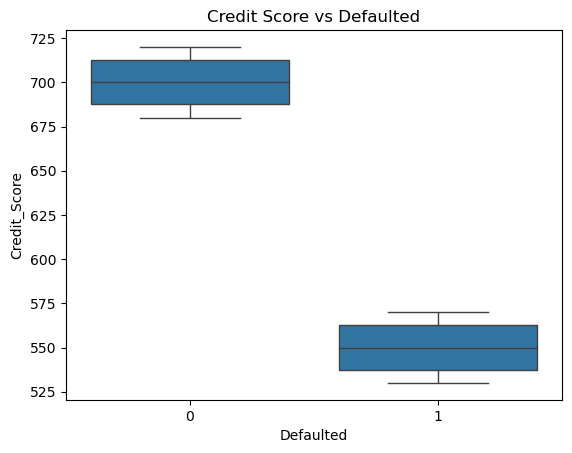

In [6]:
# EDA builds intution before modelling and predictions
# 1.Do low credit scores lead to default?
# 2.Do low incomes correlate with risk?
sns.boxplot(x='Defaulted',y='Credit_Score', data=df)
plt.title('Credit Score vs Defaulted')
plt.show()


### This shows a strong negative relationship between credit score and default risk:
### Lower credit score → Much higher chance of default
### This means Credit Score is a very powerful predictor for your model.
### In ML terms:
### High feature importance
### Strong class separation
### Likely to improve model accuracy a lot
## Customers who defaulted have significantly lower credit scores than those who did not. The clear separation between the two distributions 
## suggests that credit score is strongly associated with default risk and will be a key variable in predictive modeling.

## Income vs Default

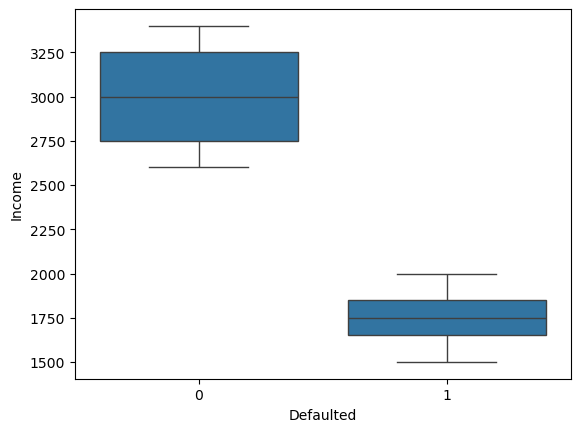

In [7]:
sns.boxplot(x='Defaulted', y='Income', data=df)
plt.title='Income vs Defaulted'
plt.show()
# This suggests lower income means higher deafult risk. Customers who default tend to have lower incomes, suggesting income is
# negatively associated with default risk and may contribute to predictive modeling.

# Co-relation matrix: A correlation matrix helps identify important predictive features, detect multicollinearity between variables  and guide feature selection and engineering before building a model.

TypeError: 'str' object is not callable

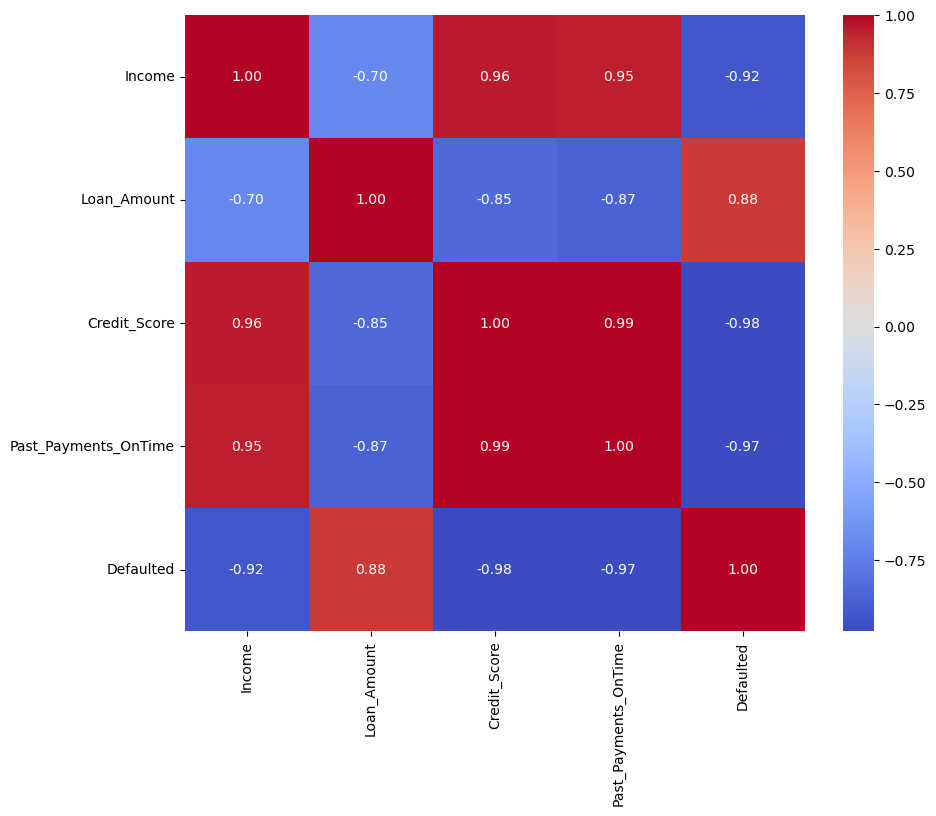

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


## FEATURE ENGINEERING

In [ ]:
# We create a new variable showing repayment burden. If loan is too big compared to income → risky. This improves model understanding.
df['Loan_to_Income'] = df['Loan_Amount'] / df['Income']
# Without creating the Loan-to-Income feature, the model would have to infer the interaction between income and loan amount on its own, 
# which may weaken predictive power, increase noise, and reduce interpretability. Feature engineering embeds domain knowledge and improves model performance.

# Prepare The Data Before Training

In [ ]:
# Here we are separating input variables and the target variable which we are predicting
X = df[['Income', 'Loan_Amount', 'Credit_Score', 'Past_Payments_OnTime','Loan_to_Income']]
y= df['Defaulted']

# TRAIN-TEST-SPLIT

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [ ]:
# Applying the model
model = LogisticRegression()
model.fit(X_train, y_train)

In [ ]:
# Predictions
y_pred = model.predict(X_test)

# Model Evaluation

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# FEATURE IMPORTANCE

In [ ]:
importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
importance.sort_values(by='Coefficient', ascending=False)


## FINAL BUSINESS CONCLUSION

## “Customers with lower credit scores, poor payment history, and high loan-to-income ratios are more likely to default. 
## This model helps improve lending decisions and reduce financial risk."